# 議事録アプリ実装体験

## 免責事項
> これは㈱Tech0によって提供される企業向けプログラムのWS用ファイルであり、その目的に特化して作成されています。当社では、このファイルを使用した際に発生する可能性のあるいかなる不具合についても責任を負いかねます。<br>ファイルの品質と機能性を確保するために万全を尽くしておりますが、万一の不具合発生時にはご理解いただけますようお願い申し上げます。

## 操作方法

下記に用意されているコードに対して、<br>
> windows: コードブロックを選択した状態でCtrl + Enter<br>
>Mac: コードブロックを選択した状態でCommand + Enter

もしくは▶マークを選択して、コードを起動してください。

## 確認

コードブロック横が✔になれば動作は完了しています。<br>
Warningが表示されていたとしても、先に続くコードが活用できていれば基本問題はございません。

In [ ]:
##################### シャープはコメントアウトと呼び、コード部分ではない解説やメモを記載できます #######################

# 議事録アプリを作ろう！
議事録を作るには、
①動画や音声データから文字を書き起こし
②書き起こしデータから、LLMを使って要約

## ○目標
*   書き起こし等の様々なライブラリを使ってみる
*   LLMを使ったアプリケーション構築の一連の流れを学ぶ（初級者）

## ○学び取っていただきたいこと：
*   Pythonを使って、簡単にGPTを使用したアプリケーションを作成できること
*   Speech to TextサービスWhisperの使い方
*   OpenAIの使い方
*   プロンプトエンジニアリングの具体イメージ






# 書き起こしをやってみよう

## 目的
動画から音声データを抽出し、文字起こしする中で下記の知識を身につける。

*   ライブラリの使用方法
*   書き起こしライブラリのWhisperと話者分離のライプラリpyannoteの使用方法を学ぶ


【参考】

Whisperとは？
https://platform.openai.com/docs/guides/speech-to-text
https://github.com/openai/whisper

Whisperで使えるモデルを学ぼう
https://qiita.com/diesekiefer/items/00d8c1507829b58a62ab


Whisperを使って動画ファイルをテキスト化しよう
https://platform.openai.com/docs/guides/speech-to-text/quickstart


## 動画ファイルから音声を抽出変換

In [1]:
#動画から音声データを抽出するのに必要なライブラリのインストール
!pip install moviepy

In [ ]:
#ライブラリの実装
from moviepy.editor import AudioFileClip

In [ ]:
# ドキュメントについて
# https://zulko.github.io/moviepy/getting_started/quick_presentation.html

In [ ]:
# まずはやってみましょう！
audiofile = AudioFileClip("tech0movie.mp4")

OSError: MoviePy error: the file video.mp4 could not be found!
Please check that you entered the correct path.

In [ ]:
#現在のディレクトリ名の確認
%pwd

'/content'

contentフォルダにいることが分かったので、そこに動画を入れましょう。

①左端のフォルダマークをクリック

②下の画像のグレー部分をクリック

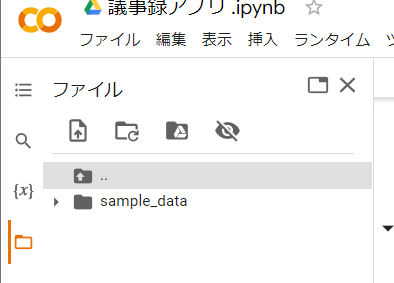

In [ ]:
#動画から音声のみを抽出
audiofile = AudioFileClip("tech0movie.mp4")  #test.mp4は動画ファイル名。入れたファイル名に変更してください。
audiofile.write_audiofile("tech0movie.wav")  #動画をtest.wavという名前に変換

# 完了したらフォルダを更新してみよう！

MoviePy - Writing audio in tech0movie.wav


MoviePy - Done.


##Whisperを使ってみよう


In [ ]:
#whisperのインストール
!pip install git+https://github.com/openai/whisper

  Cloning https://github.com/openai/whisper to /tmp/pip-req-build-ofvpu2jv
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper /tmp/pip-req-build-ofvpu2jv
  Resolved https://github.com/openai/whisper to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 28.5 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=802825 sha256=484cbca416b1af0f238104c75e2fcfffbf1c8d4f93593c9fe789726a02dfdfe3
  Stored in directory: /tmp/pip-ephem-wheel-cache-97jb9ogo/wheels/3d/da/23/a3edaa30ff9d841d474be2db3d17e9230a578e81850b82195d
Successfully built openai-whisper


In [ ]:
#whisperの実装
import whisper

In [ ]:
#whisperで使用できるモデルの確認（参考：https://qiita.com/diesekiefer/items/00d8c1507829b58a62ab）
whisper.available_models()

['tiny.en',
 'tiny',
 'base.en',
 'base',
 'small.en',
 'small',
 'medium.en',
 'medium',
 'large-v1',
 'large-v2',
 'large-v3',
 'large']

whisperには複数のモデルが含まれていることが分かりましたので、比較してみましょう！

In [ ]:
#whisperのモデルの決定、今回はtinyとsmall, mediumの2種類を利用
#mediumの方が精度は高いが、実行にも時間がかかる
input_voice = "tech0movie.wav"
model = whisper.load_model("tiny")
model2 = whisper.load_model("small")

100%|█████████████████████████████████████| 72.1M/72.1M [00:01<00:00, 63.4MiB/s]
100%|███████████████████████████████████████| 461M/461M [00:12<00:00, 40.1MiB/s]


In [ ]:
#whisperの各モデルで書き起こし
result = model.transcribe(input_voice)
result2 = model2.transcribe(input_voice)

In [ ]:
#書き起こしの結果を出力
recog_text = result["text"]
recog_text2 = result2["text"]
print("tinyの場合：",recog_text)
print("smallの場合：",recog_text2)

tinyの場合： そうです。はい。しました。というところで、5分ほどずつだんをしたいから、そうですけど。では、ずつだんま、スタートを押すのじゃと、書いてあるので、押してみなさん。スタッフ。うどんは、そばか。これは、そうね。そばか。そばかりですね。これが。わなぜなら、なぜなら、わなか、面が、面のほと、ほそさん。うん。出来に、なんか、一杯食べるので、この、この、このつが、おいほが、あれ、やっぱり、そうね、そうね、その感覚なかった。うどんは、そばか。うどんは、むずたしなかった。キセツにも、よるし。やっぱり、やっぱり、ザルソバ。みたいなのやっぱ、なんか、でも、ザルウドも好きだしな。そうね、やっぱり、なんか、水のおいしいところとか、そば、やっぱ食べてみんなくなるし。なんか、チェーンってんで、なんか、気があるに入れるそばやさん、あんま多くなくないですか。あー、ないです。なんか、バルガメセーメンとか、花マルウドンって、結構、アル、イメージで、まぁ、しかも両方とも、うまい。でも、そばって、そじぼうぐらいしか。でも、クレア、たし、思いつか、たしが、チェーン、そばとか、あ、チェーン、あ、あんまりないな、そばのイメージが、チェーン、そばだね、もう、あ、たってくうもの、で、すしか、そばか。いまいろ、パストフードなんですからね。そば、文字通り、パストフード、どこしれない。そば、そば、そば、僕は、結論が危険でてないですけど。うん。どっちかつたら、どっちかつたら、うどんかな、うどんか、そばは、なんだろう。特別な日は、そばかなってもんすよね。たし、おいしいおそばやさんとか、もしごしそばとか、うんうんうんうん。日常ぐいはやっぱうどんすね。うん、たし、たし、そう、そばで思い出すと、正解やまい、僕はもう、おなかつよ、いいほうだ。そば、そば、どこだし、ますよね。たし、いっぱい食べたきついなってときは、うん。たしか、たしか、という感じで、ちょうど、三分ぐらいですかね。うん。たしたんでじゃあ、結論は、私が、うどんは、まいださんが、そばは、いうことで、これを聞いている、アートはいっぱい、どちらはでしょうか。というところ、そう実の、あれですね。反显後に、ぜひ、皆さんから教えていただきたいなと、お会いまさ。というところで、レコーディングをストップします。おい。
smallの場合： はい、どうしました?というところで

In [ ]:
# ファイルを書き込み用にオープンして、ファイル先頭から文字列を書き込む
with open('議事録.txt', 'w') as f:
    f.write(recog_text2)
    f.close()

書き起こしの結果はどうだったでしょうか？
興味ある方は、別のモデルも試してみてください。

結果を見てみると、話している人の区別がついていないので、議事録を作成するには話者分離を行う必要です。
→今回は時間の都合上割愛します。

# 文字起こし文章の要約

## 目的
文字起こし文章のテキストデータをchatGPTで要約する中で、下記の知識を身につける。
* openAIのAPIを利用してPythonでchatGPTを実行できるようになる
* プロンプトの工夫点を学び、自分なりにプロンプトを書けるようになる

## 必要なライブラリ（実行時の環境）
* openai 0.27.8

### ⓪ ライブラリのインストール

In [2]:
!pip install openai==0.27.8

Defaulting to user installation because normal site-packages is not writeable
Could not fetch URL https://pypi.org/simple/openai/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/openai/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)'))) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)'))) - skipping


ERROR: Could not find a version that satisfies the requirement openai==0.27.8 (from versions: none)
ERROR: No matching distribution found for openai==0.27.8


### ①-1：openAI APIの準備

In [3]:
import openai
openai.api_type = "azure"
openai.api_base = "https://tech0-gpt-event-westus.openai.azure.com"
# 実際はこのように書くと、「悪用」されてしまいます。この秘密鍵は今日中に使えなくなります。
openai.api_key = "e145f3d236e34001a3e8234787245bdb"
openai.api_version = "2023-05-15"

### ①-2：openAI APIのテスト
上記のAPIキーで問題なく作動することを確認する

In [4]:
# chatGPTに質問する
response = openai.ChatCompletion.create(
    engine="gpt-35-turbo",
    messages=[
        {"role": "user", "content": "大谷翔平について50文字以内で教えて"},
    ],
)
# 回答の表示
print(response.choices[0]["message"]["content"].strip())

APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


### ③-1： 文字起こし文章の確認
文字起こし＆要約アプリの打ち合わせをした時の文字起こしデータを要約してみましょう。

ただし、GPTで扱える文章量には制限があることに注意します。今回は短めの文章なので問題なく対応できるはずです。

トークン数のカウント：https://techblog.gmo-ap.jp/2023/06/12/tiktoken/

In [5]:
# 文字起こしデータはファイルにドラック＆ドロップで保存してください
# テキストデータの格納（変数all_text）
with open("議事録.txt") as f:
    all_text = f.read()
# 文字数の確認
print(str(len(all_text))+" 文字")
#文章の一部を表示
print("---------------------")
print(all_text[0:100])

846 文字
---------------------
はい、どうしました?というところで、5分ほど雑談をしたいなと思うんですけど、雑談マンスタートをすのじゃと書いてあるので、押してみます。ストップ。うどんは?そばは?うわー、これはそうね。そばはですね。な


In [11]:
def summary(all_text):
  # プロンプト文の作成（文字起こし文章を要約するように依頼）
  prompt = "次のテキストを要約してください：{}".format(all_text)
  # chatGPTに質問する
  response = openai.ChatCompletion.create(
      engine="gpt-35-turbo",
      messages=[
          {"role": "user", "content": prompt},
      ],
  )
  # 回答の表示
  res = response.choices[0]["message"]["content"].strip()
  return res

In [12]:
# 要約結果の確認
result = summary(all_text)
print(result)

5分間の雑談を楽しんでいた2人が、うどんとそばのどちらが好きかを話し合っている。結論は出なかったが、うどん派とそば派に分かれ、聞いている人にもどちらが好きか問いかけている。


時間が余ったら...
プロンプトエンジニアリングに挑戦してみよう。

In [13]:
# このブロックともう一つ下のブロックを使ってGPTとやり取りしてみましょう。
def kaiwa(role,input_text):
  # chatGPTに質問する
  response = openai.ChatCompletion.create(
      engine="gpt-35-turbo",
      messages=[
          {"role": "assistant", "content": role},
          {"role": "user", "content": input_text},
      ],
  )
  # 回答の表示
  res = response.choices[0]["message"]["content"].strip()
  return res

In [19]:
role = "この中に役割とやってほしいことを定義してみましょう"
#例： role = "下記の文章を中国語に翻訳して、どういうサービスか箇条書きで説明して下さい。"
with open("testfile.txt") as f:
    test_text = f.read()

In [20]:
res = kaiwa(role, test_text)
print(res)

这是 Tech0 Boot Camp 的宣传文案，基本上是一家提供技术培训的公司。这里提供日本以及国际环境下变革企业所需要的技术能力，主要通过提供“Tech0 Boot Camp”计划帮助人们提升技能，以创造和变革企业的商业生态。

以下是该服务的主要特点：

- 提供期限为1个月的退款保障
- 超过200名学生已参与该培训
- 通过商业与数字技术，培养具有创新变革精神的人才
- 提供线上讲座会议，可以通过官方 LINE 预订
- 提供 Touch0 Boot Camp，让非技术人员深入接触工程技术，并与志同道合的伙伴一起创造新价值的社区
- 获得“Tech0 Boot Camp”的学员普遍好评，覆盖200名以上学生和超过96.5%的学员满意度

该服务还提供详细的计划表，包括基础学习、模拟设计、实践培训和应用能力提升等内容，并特别注明提供针对不同水平的学员个性化的学习支持，以及通过与其他学员合作学习的机会。

通过该服务，学员可以在365天内更深入了解日本和国际领先企业所需的技术能力，培养具有卓越技能的人才。
